<a href="https://colab.research.google.com/github/gpostill/Datathon5/blob/main/Datathon5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Datathon 5

<b> Team: </b> Gemma Postill, Khalil Kain, Emily Lau <br>
<b> Team Number: </b> 13<br>
<b> Course: </b> CHL5239 Fall 2023<br>
<b> Date: </b> 2023-11-16 <br>
<b> Dataset: </b> multi-dimensional time-series data <br>


# 1. Data exploration

In [ ]:
#mount drive - for Import Option 1
from google.colab import drive
drive.mount('/content/drive')


#importing the necessary packages
from google.colab import files
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import resample
from tqdm import tqdm


import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader


import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("drive/My Drive/mhealth.csv") #Gemma

df.head() #Visualizing the first few rows of the data


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


##Descriptive Analysis of the Data

In [ ]:
#understanding the data

df.info() #Understanding the columns of the data

df.describe() #Finding the max and min of features in the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       999999 non-null  float64
 1   aly       999999 non-null  float64
 2   alz       999999 non-null  float64
 3   glx       999999 non-null  float64
 4   gly       999999 non-null  float64
 5   glz       999999 non-null  float64
 6   arx       999999 non-null  float64
 7   ary       999999 non-null  float64
 8   arz       999999 non-null  float64
 9   grx       999999 non-null  float64
 10  gry       999999 non-null  float64
 11  grz       999999 non-null  float64
 12  Activity  999999 non-null  int64  
 13  subject   999999 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 106.8+ MB


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.00000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1.473954,-9.618162,-0.944714,-0.023928,-0.616830,-0.131466,-3.578801,-5.72591,2.645165,-0.293943,-0.450610,0.283440,1.702181
std,3.751845,4.076683,5.333969,0.495758,0.354135,0.547774,4.770602,5.70559,3.897641,0.528506,0.564118,0.558707,3.250841
min,-22.146000,-19.619000,-19.373000,-2.146600,-7.789900,-2.567800,-22.361000,-18.97200,-18.239000,-8.339200,-3.570800,-2.689700,0.000000
25%,0.115100,-10.116000,-2.662400,-0.454550,-0.816140,-0.561890,-5.984100,-9.36790,0.406120,-0.711760,-0.882960,-0.211210,0.000000
50%,1.336800,-9.644800,-0.016372,-0.070501,-0.703560,-0.137520,-2.859700,-7.35990,2.231200,-0.372550,-0.622180,0.325430,0.000000
75%,2.586900,-9.034300,1.371500,0.426720,-0.542210,0.345780,-1.021200,-2.45280,5.201200,0.049020,-0.080082,0.786640,2.000000
max,20.054000,21.161000,25.015000,60.484000,2.011300,2.770100,19.864000,22.19100,25.741000,3.319600,1.556500,2.750000,12.000000


In [ ]:
#Identifying the number of patients &  Counting the number of records associated with each patient
print(df['subject'].value_counts())

print(df[['Activity','subject',]].value_counts())


subject1    161280
subject2    130561
subject8    129024
subject3    122112
subject5    119808
subject4    116736
subject7    104448
subject6     98304
subject9     17726
Name: subject, dtype: int64
Activity  subject 
0         subject1    126106
          subject8     95692
          subject2     95029
          subject3     86732
          subject5     85861
                       ...  
12        subject5      1024
          subject6      1024
          subject7      1024
          subject8      1024
2         subject9       830
Length: 107, dtype: int64


In [ ]:
#Determining missingness
df.isnull().sum()
#Results show no missingness in the columns

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

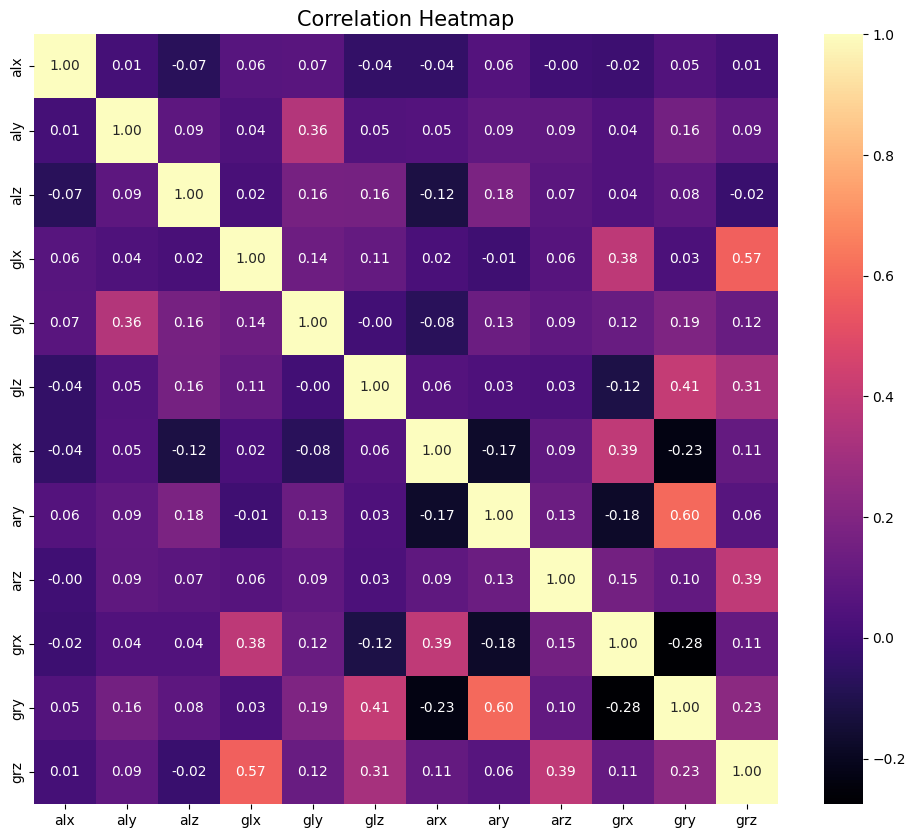

In [ ]:
#Correlation map of numerical features

#numberical columns
ncol_analysis = ["alx", "aly", "alz", "glx", "gly", "glz", "arx", "ary", "arz", "grx", "gry", "grz"]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = df[ncol_analysis].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


In [ ]:
# Pairs of variables that maybe collinear (EL)
# Initialize list to store pairs with the specified correlation range
specified_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = correlation_matrix.iloc[i, j]
        # Check if correlation is greater than 0.3 and less than 1
        if 0.3 < abs(corr_value) < 1:
            specified_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# Print out the pairs with the specified range of correlation
for pair in specified_corr_pairs:
    print(f"{pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

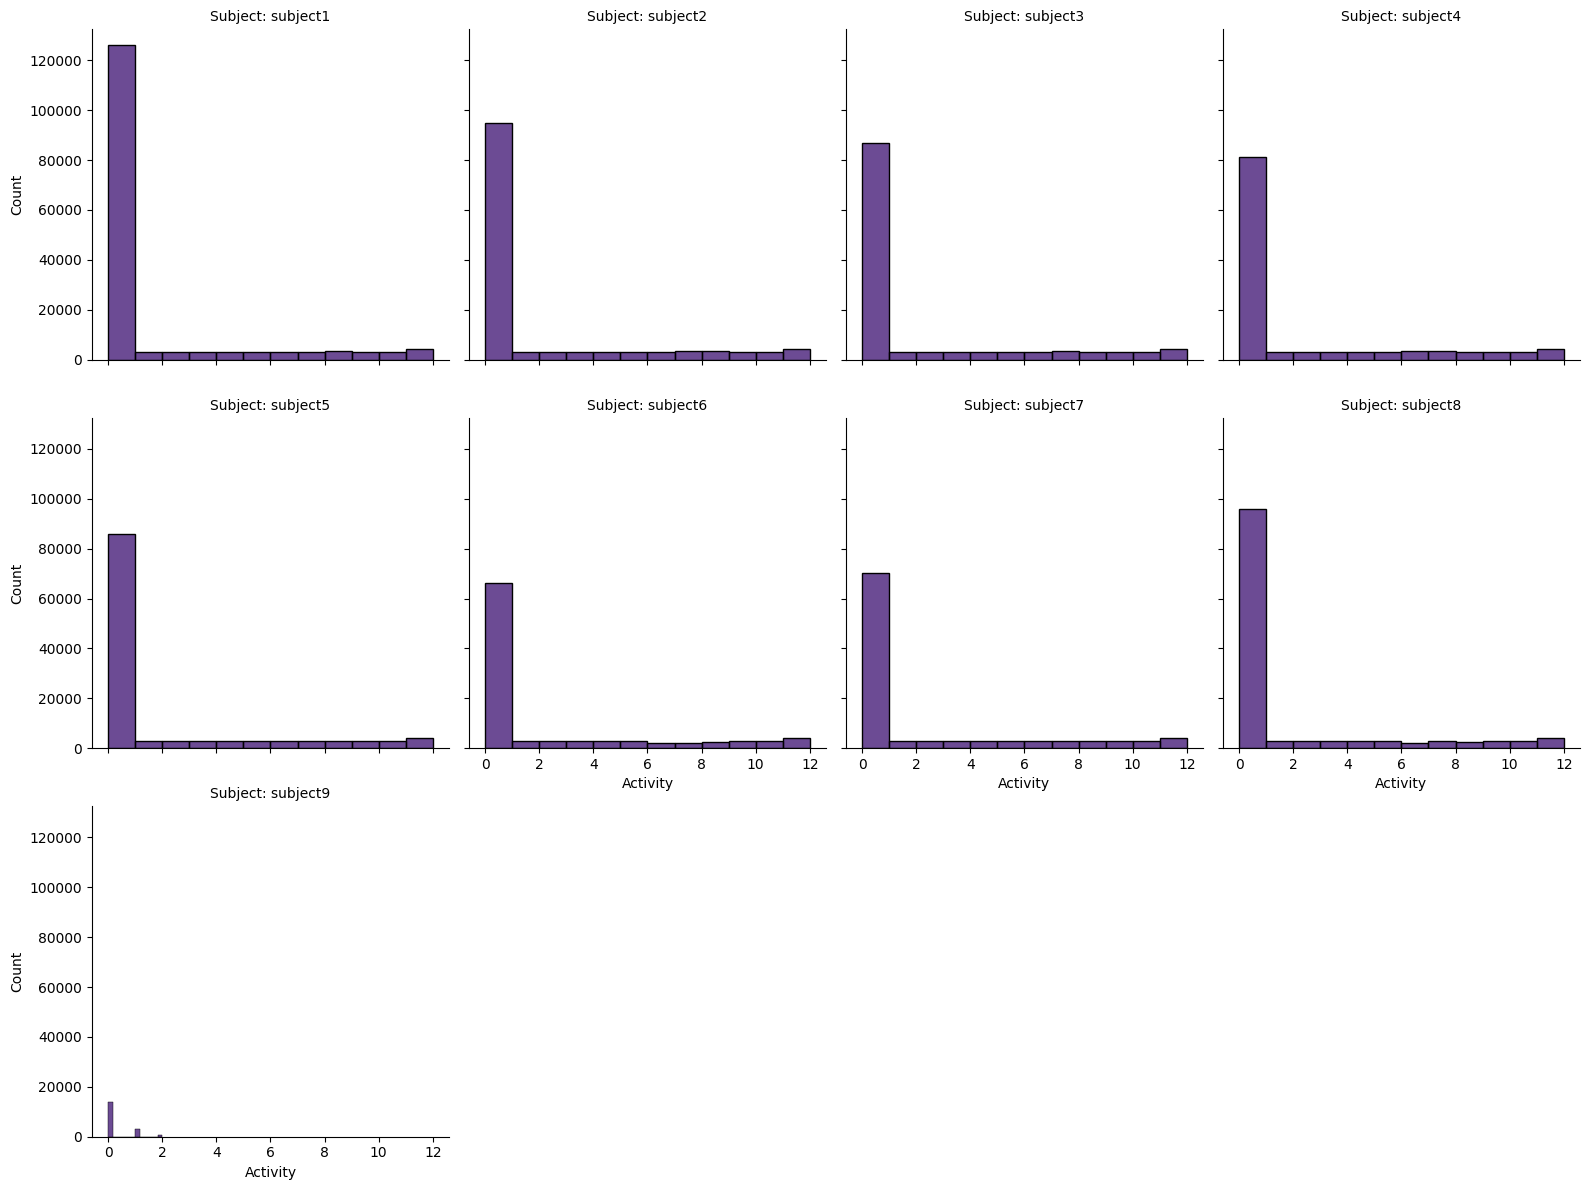

In [ ]:
#Visualizing the number distribution of activities within a patient

# Get a color from the 'magma' colormap
color = plt.get_cmap('magma')(0.2)  # 0.6 is arbitrarily chosen to get a distinct color from the colormap

# Create a FacetGrid using the 'Subject' feature for faceting and map a histogram to it
g = sns.FacetGrid(df, col='subject', col_wrap=4, height=4, aspect=1)
g.map(sns.histplot, 'Activity', bins=12, kde=False, color=color)

# Adding titles and labels for clarity
g.set_titles('Subject: {col_name}')
g.set_xlabels('Activity')
g.set_ylabels('Count')

# Display the FacetGrid
plt.tight_layout()
plt.show()


In [ ]:
#  Alternative visualization - Activity (EL)
import matplotlib.pyplot as plt
import seaborn as sns

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=df)
plt.title('Activity Distribution AMONG SUBJECTS')
plt.xlabel('ACTIVITY', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

In [ ]:
# Show count and % (EL)
counts = df['Activity'].value_counts()

# Calculate percentages
percentages = (df['Activity'].value_counts(normalize=True) * 100).round(2)

# Combine counts and percentages into a single DataFrame for a clearer view
summary = pd.DataFrame({'Count': counts, 'Percentage': percentages})

print(summary)

In [ ]:
#  Alternative visualization - Activity (EL)

# Setting the color palette to 'mako' which has maroon-like colors
sns.color_palette("magma", as_cmap=True)

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='subject', data=df)
plt.title('Counts of subject revisits')
plt.xlabel('subject', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

In [ ]:
# Show subject counts (EL)
counts = df['subject'].value_counts()

summary = pd.DataFrame({'Count': counts})

print(summary)

# 2. Encode target column 'Activity'

In [ ]:
#Creating a activity class variable


#0 = Stationary ()
#1 = Moderate (walking, climbing stairs, crunches)
#2 = High-instensity (cycling, jogging, running, jumping)


###Run this as our outcome

map_activity_list = {0: 0,
                     1: 1, 2: 1, 3: 1,
                     4: 2, 5: 2, 6: 2, 7: 2, 8: 2,
                     9: 3, 10: 3, 11: 3, 12: 3}
df['Activity_Mapped'] = df['Activity'].map(map_activity_list)

# Verifying the encoding
activity_counts = df['Activity_Mapped'].value_counts()
print(activity_counts)

In [ ]:
# Visualize new variable 'Activity_EL'
import matplotlib.pyplot as plt
import seaborn as sns

# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Race Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity_Mapped', data=df)
plt.title('Activity Distribution Among Subjects')
plt.xlabel('ACTIVITY', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

Note that, with respect to feature engineering, at this point we have observered:
- No missingness
- No outliers
- No categorical variables that have yet to be encoded (Activity is already encoded)
- All variables in the dataframe will be included in the analysis

# 3. Splitting into test and training (80:20)

In [ ]:
# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42) #Shuffle = False prevents reshuffling during split

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

#Checking how many times each subject this appears
print('Training Data:')
print(train_df['subject'].value_counts()) #counting the number of records per patient
print('Testing Data:')
print(test_df['subject'].value_counts()) #counting the number of records per patient

Training Data:
subject1    161280
subject3    122112
subject5    119808
subject4    116736
subject7    104448
subject6     98304
subject9     17726
Name: subject, dtype: int64
Testing Data:
subject2    130561
subject8    129024
Name: subject, dtype: int64


# 4. Scaling the Data

In [ ]:
# Identifying numerical columns (excluding 'patient_nbr' and 'readmitted')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity') #Activity will be our label
print(numerical_columns)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
650497,-0.552567,0.055747,-0.810059,0.578981,-0.800349,0.501238,-1.814050,0.678081,-0.577362,-0.556227,2.101663,0.012934,0,subject6
650498,-1.531305,0.104970,-0.369903,0.693642,-0.720535,0.533071,-1.213665,0.758524,-0.989728,-0.556227,2.101663,0.012934,0,subject6
650499,-1.634742,0.162005,-0.446628,0.693642,-0.720535,0.533071,-0.665509,0.721946,-1.405218,-0.770194,1.968628,-0.202877,0,subject6
650500,-1.058302,0.102992,-0.337213,0.693642,-0.720535,0.533071,-0.339275,0.722070,-1.640731,-0.770194,1.968628,-0.202877,0,subject6
650501,-1.119704,0.167596,-0.387926,0.601930,-0.704601,0.653347,-0.163938,0.695687,-1.610853,-0.770194,1.968628,-0.202877,0,subject6


# 5. Checking and addresssing class imbalance

In [ ]:
# Checking the class distribution in the activity column of the training set

print("Value counts of subjects")
print(train_df['subject'].value_counts())

print("Value counts of Activity")
print(train_df['Activity_Mapped'].value_counts())

#Class distribution
class_distribution = train_df.groupby('subject').apply(lambda x : x.iloc[-1]['Activity_Mapped']).value_counts()
class_distribution

Value counts of subjects
subject1    161280
subject3    122112
subject5    119808
subject4    116736
subject7    104448
subject6     98304
subject9     17726
Name: subject, dtype: int64
Value counts of Activity
0     530225
1      21504
2      19262
3      18432
4      18432
9      18432
10     18432
11     18432
5      18432
6      17665
8      17511
7      17460
12      6195
Name: Activity, dtype: int64


0    6
2    1
dtype: int64

EL

In [ ]:
# Ensure that subjects did not overlap between training and testing (EL)
train_subjects = train_df['subject'].unique()
test_subjects = test_df['subject'].unique()

# Displaying the unique subjects in each set
print("Training Set Subjects:", train_subjects)
print("Testing Set Subjects:", test_subjects)

# Displaying the shape of the datasets
print("Training Set Shape:", train_df_shape)
print("Testing Set Shape:", test_df_shape)

In [ ]:
len(train_df['subject'].unique())

In [ ]:
from sklearn.utils import resample

# Grouping the original training data by 'subject'
grouped_by_subject = train_df.groupby('subject')

# Creating separate lists for each class
groups_class_0 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity_Mapped'] == 0] for subject in grouped_by_subject.groups ]
groups_class_1 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity_Mapped'] == 1] for subject in grouped_by_subject.groups ]
groups_class_2 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity_Mapped'] == 2] for subject in grouped_by_subject.groups ]
groups_class_3 = [grouped_by_subject.get_group(subject)[grouped_by_subject.get_group(subject)['Activity_Mapped'] == 3] for subject in grouped_by_subject.groups ]

In [ ]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Oversampling the minority groups (class 1,2,3)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_class_2 = resample(groups_class_2, replace=True, n_samples=len(groups_class_0), random_state=42)
# Oversampling records in groups_class_3 to match the number in groups_class_0
oversampled_groups_class_3 = resample(groups_class_3, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_1 + oversampled_groups_class_2 + oversampled_groups_class_3 + groups_class_0

In [ ]:
# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'subject'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

balanced_groups_copy

In [ ]:
print(len(balanced_groups))

In [ ]:
print(len(groups_class_3))

# 6. Generating sequences for activity and subject

In [ ]:
# Appraoch 2
sensor_columns = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']

def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity_Mapped'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_df, sequence_length=100)
X_test, y_test = create_sequences(test_df, sequence_length=100)

# 7. Recurrent Neural Network (RNN): KK

### Splitting into test and training (80:20)

In [ ]:
# Grouping by 'patient_nbr' and creating a list of dataframes, one per group
grouped = df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42) #Shuffle = False prevents reshuffling during split

# Reassembling the training and test datasets from the groups
train_df_rnn = pd.concat(train_groups)
test_df_rnn = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_rnn_shape = train_df.shape
test_df_rnn_shape = test_df_rnn.shape

train_df_rnn_shape, test_df_rnn_shape

#Checking how many times each subject this appears
print('Training Data:')
print(train_df_rnn['subject'].value_counts()) #counting the number of records per patient
print('Testing Data:')
print(test_df_rnn['subject'].value_counts()) #counting the number of records per patient

### Normalizing the data

In [ ]:
# Identifying numerical columns (excluding 'patient_nbr' and 'readmitted')
numerical_columns = train_df_rnn.select_dtypes(include=['int64', 'float64']).columns.tolist()
columns_to_remove = ['Activity', 'Activity_Mapped'] #Activity_Mapped will be our label

# Remove specified columns from numerical_columns
numerical_columns = [col for col in numerical_columns if col not in columns_to_remove]

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df_rnn[numerical_columns] = scaler.fit_transform(train_df_rnn[numerical_columns])
test_df_rnn[numerical_columns] = scaler.transform(test_df_rnn[numerical_columns])

# Checking the first few rows of the normalized training data
train_df_rnn.head()

### Sequence generation

In [ ]:
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity2' is the target variable and is the same for the entire sequence
        label = sequence['Activity_Mapped'].iloc[0]
        sequences.append(sequence[numerical_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train_rnn, y_train_rnn = create_sequences(train_df_rnn, sequence_length=100)
X_test_rnn, y_test_rnn = create_sequences(test_df_rnn, sequence_length=100)


X_train_rnn.shape, y_train_rnn.shape, X_test_rnn.shape, y_test_rnn.shape

### Checking and addressing class imbalance

In [ ]:
from collections import Counter

# Checking the class distribution in the activity column of the training set
print("Value counts of subjects")
print(train_df_rnn['subject'].value_counts())

print("Value counts of Activity2")
print(train_df_rnn['Activity_Mapped'].value_counts())

#Class distribution
class_distribution = Counter(y_train_rnn)
print(class_distribution)

### Oversampling non-zero activity classes (i.e., minority classes)

In [ ]:
from sklearn.utils import resample

count = [class_distribution.get(i, 0) for i in range(max(class_distribution.keys())+1)]

# Applying the median count for activity levels other than 0
COUNT = np.max(count)

# Creating sequences for Activity2 == 0
ActivityLevel_0 = X_train_rnn[y_train_rnn == 0]
ActivityLevel_1 = X_train_rnn[y_train_rnn == 1]
ActivityLevel_2 = X_train_rnn[y_train_rnn == 2]
ActivityLevel_3 = X_train_rnn[y_train_rnn == 3]

# Creating separate labels for these sequences
ActivityLabel_0 = y_train_rnn[y_train_rnn == 0]
ActivityLabel_1 = y_train_rnn[y_train_rnn == 1]
ActivityLabel_2 = y_train_rnn[y_train_rnn == 2]
ActivityLabel_3 = y_train_rnn[y_train_rnn == 3]

# Performing oversampling for activity levels other than 0
ActivityLevel_0_eq = resample(ActivityLevel_0,replace=False,n_samples=int(COUNT),random_state=42)
#
ActivityLevel_1_eq = resample(ActivityLevel_1,replace=True,n_samples=int(COUNT),random_state=42)
ActivityLevel_2_eq = resample(ActivityLevel_2,replace=True,n_samples=int(COUNT),random_state=42)
ActivityLevel_3_eq = resample(ActivityLevel_3,replace=True,n_samples=int(COUNT),random_state=42)


ActivityLabel_0_eq = np.zeros(int(COUNT))
#
ActivityLabel_1_eq = np.ones(int(COUNT))
ActivityLabel_2_eq = 2*np.ones(int(COUNT))
ActivityLabel_3_eq = 3*np.ones(int(COUNT))

In [ ]:
# Concatenating oversampled training sequences together
X_train_eq = np.concatenate((ActivityLevel_0, ActivityLevel_1_eq, ActivityLevel_2_eq, ActivityLevel_3_eq))

y_train_eq = np.concatenate((ActivityLabel_0, ActivityLabel_1_eq, ActivityLabel_2_eq, ActivityLabel_3_eq))

# Observing distribution
unique_eq, counts_eq = np.unique(y_train_eq, return_counts=True)
class_distribution_resampled = dict(zip(unique_eq, counts_eq))
print(class_distribution_resampled)

# Validating the dimensions of the resampled training sets
print(X_train_eq.shape, y_train_eq.shape)

### RNN model building with PyTorch

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = X_train_eq.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 4  # For four-class classification
epochs = 20
learning_rate = 0.001
batch_size = 400
_lambda_ = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train_eq, dtype=t.float32), t.tensor(y_train_eq, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU() # Since outcome is multi-class, ReLU can stil be used in the hidden layers

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
# optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            # out, _ = rnn_layer2(out)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

In [ ]:
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

### Plot training and validation accuracy over epochs

In [ ]:
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# 8.Long Short-Term Memory network (LSTM) - EL

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# Hyperparameters
input_size = sequences.shape[2]
hidden_size = 128  # Number of hidden units in RNN
num_classes = 4  # For four-class classification
epochs = 100
learning_rate = 0.001
batch_size = 256
landa = 0.001  # Regularization term (lambda)

In [ ]:
# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
# rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
# dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

In [ ]:
# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

In [ ]:
# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        # out, _ = rnn_layer2(out)
        # out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        # l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        # loss = loss_fn(out, Y) + landa * l2_term
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            # out, _ = rnn_layer2(out)
            # out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()